# Descriptive Statistics (Chapter 3)

Descriptive statistic normally applies to the analyzing data in a way that describes, shows, or summarizes data in a meaningful way. **We do not draw conclusions from descriptive statistics**!!  That is the art of inferential statistics, which we will explore in the next chapter.  Let us differentiate the two:
* Suppose that we take a sample of everyone's age in the class
* We can use **descriptive statistics** to summarize the data that is collected (mean, median, standard deviation, quantiles, ...)
* We would use **inferential statistics** to infer information about graduate students enrolled in a masters program at Michigan Tech
Often, we want to infer information about a **population**, but are only able to observe a part of the population, known as the **Sample**.

Goal for this module:
* Learning statistical terms and concepts to describe a data sample.
* Using Python to recover descriptive statistics of data
* More experience visualizing data using Python

I will cover a separate example with roughly the same topics/layout as our textbook, so that you have two distinct examples to work from.  The data set I have chosen to use is the wine quality data set from the UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/Wine+Quality.  As we will see, this data set provides many attributes of wine, including a summary "quality score" based on an expert opinion.  We may visit this data set in a later week to try and use machine learning to assign a quality score based on wine attributes.  For now, we are just interested in generating **descriptive statistics** from the data.  First, lets setup our python libraries and toolboxes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, we need to prepare our data.  For this notebook, we will pull our data directly from the UCI repository.  It turns out, there are two data sets: one for red one, one for white wine. Lets pull the data for the redwine. In this case, we are reading in a csv file (from the web) into a pandas dataframe object.

In [3]:
url  =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url)
wine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


Oops, it looks like semi-colons were used as a limiter (separator) for the data.  (The default delimiter is a comma). Let's re-import using the semi-colon as a separator

In [4]:
wine = pd.read_csv(url, sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


That's better.  Lets find out the number of observation and features (shape) of our data set

In [ ]:
wine.shape

So, 1599 observations (rows) and 12 features (columns).  The "quality" column is output variable in some sense.  Lets group by quality, and find out how many wines have a specific quality rating

In [ ]:
counts = wine.groupby('quality').size()
print counts

Looks like most wines are mediocre (quality rating of 5 or 6). Few wines are truly excellent or poor.  Let's proceed with defining some useful descriptive statistics
* mean, $\mu$ (some people use the non-technical term, average)
* standard deviation, $\sigma$ (or variance, $\sigma^2$)
* quantiles / percentiles
* distributions

Let's proceed with finding the mean pH of wines, grouped by quality.

In [ ]:
a = wine[['pH','quality']].groupby('quality').mean()
print(a)

Mathematically, how are these numbers obtained?  Well, we know for example, there are 10 wines with quality 3 (based on our counts above).  We can extract the pH values of these 10 wines.  The mean is the sum of the values divided by the number of values, $$\mu = \frac{1}{n} \sum_{i=1}^n x_i$$



In [ ]:
wine[wine['quality']==3 ]

In [ ]:
wine[wine['quality']==3 ]['pH']

In [ ]:
my_sum = 0
for pH in wine[wine['quality']==3 ]['pH']:
    my_sum += pH
my_mean = my_sum/wine[wine['quality']==3 ]['pH'].size
print("mean pH of wine with quality 3 is " + str(my_mean) + ".")

The mean is often not a sufficient descriptor of data.  One often cares about how the data *deviates* from the mean, the so-called "spread" of the data.    The common measurement is the mean squared deviation, $$\sigma^2 = \frac{1}{n} \sum_i(x_i-\mu)^2.$$  Lets use the group by function to find the standard deviation by quality, and then recover the standard deviation manually.

In [ ]:
a = wine[['pH','quality']].groupby('quality').std()
print(a)

In [ ]:
my_sum = 0
for pH in wine[wine['quality']==3 ]['pH']:
    my_sum += (pH-my_mean) ** 2
my_variance = my_sum/(wine[wine['quality']==3 ]['pH'].size)
my_std = np.sqrt(my_variance)
print("(mean and standard deviation) of pH, wine with quality 3 is (%g,%g)."% (my_mean,my_std) ) 

Well, that's not quite the same.  The built-in std() function gives a standard deviation of 0.144052 for wines of quality 3, and our manual calculation gives us a standard deviation of 0.13666.  What's going on?  This is a subtle point, related to populations and samples.  Here, our data set is assumed to be the entire **population** of red wines, so the formula, and manual implementation of standard deviation is correct.  What Python has computed is the "sample "standard deviation, $$s^2 = \frac{1}{n-1} \sum_i(x_i-\bar{x})^2.$$  The population and sample standard deviation is related by the formula $$ s^2 = \frac{n-1}{n}\sigma^2.$$  As $n\to\infty$, the population and sample standard deviation approach each other.

In [ ]:
sample_std = my_std*np.sqrt( float(wine[wine['quality']==3 ]['pH'].size )/ (wine[wine['quality']==3 ]['pH'].size - 1))
print(sample_std)

A large variance (relative to the mean) indicates that at least some of the data is far from the mean and each other.  This raises the question, how do outliers affect our data?  While the mean of a sample is a very good descriptor of the sample, it can be drastically affected by an outlier.  One measure that is not affected by outliers, is the **median** of the data, that is, if we order all the entries according to their values, the median is the value that is in the middle of the ordered list.  

In [5]:
a = wine[['pH','quality']].groupby('quality').median()
print(a)

           pH
quality      
3        3.39
4        3.37
5        3.30
6        3.32
7        3.28
8        3.23


More generally, we can measure (and display) quantiles (or percentiles).   The median is the 0.5 quantile (50 percentile), i.e., 50% of the data is less than the median, 50% of the data is larger than the median.  The 0.25 quantile (25 percentile) means that 25% of the data is less than the 0.25 quantile, (100-25)% = 75% is larger than the 0.25 quantile.  Often, one uses the 5-number summary: $$[x_{min},Q_1,Q_2,Q_3,x_{max}],$$ where
* $x_{min}$ is the smallest value
* $Q_1$ is the first quartile, a.k.a., 0.25 quantile, aka. 25 percentile
* $Q_2$ is the second quartile, a.k.a., 0.5 quantile, aka. 50 percentile, a.k.a. median
* $Q_3$ is the third quartile, a.k.a., 0.75 quantile, aka. 75 percentile
* $x_{max}$ is the largest value

In [6]:
a = wine[['pH','quality']].groupby('quality').describe()
print(a)

            pH                                                     
         count      mean       std   min     25%   50%    75%   max
quality                                                            
3         10.0  3.398000  0.144052  3.16  3.3125  3.39  3.495  3.63
4         53.0  3.381509  0.181441  2.74  3.3000  3.37  3.500  3.90
5        681.0  3.304949  0.150618  2.88  3.2000  3.30  3.400  3.74
6        638.0  3.318072  0.153995  2.86  3.2200  3.32  3.410  4.01
7        199.0  3.290754  0.150101  2.92  3.2000  3.28  3.380  3.78
8         18.0  3.267222  0.200640  2.88  3.1625  3.23  3.350  3.72


note again, that the std deviation number is not quite correct if we think of the data set as describing a **population**.

Alright, lets switch gears and by trying to visualize the distribution of data.  The most common representation of a distribution is a histogram.  We'll use the seaborn package which has some advanced visualization tools compared to pandas. 

In [10]:
import seaborn as sns

We'll only worry about plotting the distribution of wines with quality 5,6 and 7, since the other qualities do not have that many observations.

In [9]:
q5 = wine[wine['quality']==5 ]['pH']
q6 = wine[wine['quality']==6 ]['pH']
q7 = wine[wine['quality']==7 ]['pH']

Let's plot the histogram using the hist() function

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


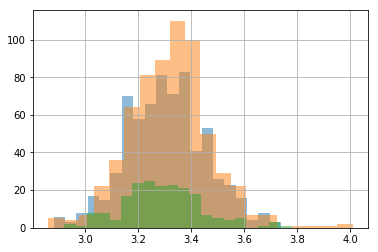

In [16]:
q5.hist(normed=0, histtype = 'stepfilled',alpha=0.5, bins = 20)
q6.hist(normed=0, histtype = 'stepfilled',alpha=0.5, bins = 20)
q7.hist(normed=0, histtype = 'stepfilled',alpha=0.5, bins = 20)


In the above plot, we are visualizing the frequency of values in our data set.